# Final  - Private College K Means

For this final project I will take a look at 'U.S. News and World Report’s College Data'from the "ISLR" R package 
Link: https://www.kaggle.com/datasets/flyingwombat/us-news-and-world-reports-college-data/code

For this project I will apply a K-means model on my data, and attempt to identify private and public colleges from their data. 

Below is a list of the datapoints provided per college: 
- Private A factor with levels No and Yes indicating private or public university

- Apps Number of applications received

- Accept Number of applications accepted

- Enroll Number of new students enrolled

- Top10perc Pct. new students from top 10% of H.S. class

- Top25perc Pct. new students from top 25% of H.S. class

- F.Undergrad Number of fulltime undergraduates

- P.Undergrad Number of parttime undergraduates

- Outstate Out-of-state tuition

- Room.Board Room and board costs

- Books Estimated book costs

- Personal Estimated personal spending

- PhD Pct. of faculty with Ph.D.’s

- Terminal Pct. of faculty with terminal degree

- S.F.Ratio Student/faculty ratio

- perc.alumni Pct. alumni who donate

- Expend Instructional expenditure per student

- Grad.Rate Graduation rate

<br> 
The data is limited as it only looks at one academic years data, expanding on this dataset will help all models to have better classification for other results (ex: rank)

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from scipy.spatial.distance import jaccard, cosine 
from pytest import approx
import plotly.express as px
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

## Importing data from Kaggle

In [144]:
data = './data/College.csv'

In [145]:
df_data = pd.read_csv(data, index_col=0)

## A look at the data and EDA

In [146]:
df_data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [147]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

### A look at the data

In [78]:
df_data['Grad.Rate'].describe()

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64

In [148]:
df_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Data visualizations

In [79]:
fig = px.histogram(df_data, x='Grad.Rate')
fig.show()

### EDA Cleaning of data
The data is mostly clean, so no cleaning is needed but there seems to be a college with a graduation rate above 100%, which is an anomoly as more students graduated than were admitted during the academic year of 1995. We will impute that data point to 100% instead of dropping it.

In [153]:
df_data[df_data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [154]:
df_data.at['Cazenovia College', 'Grad.Rate'] = 100

In [155]:
df_data[df_data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


We also need to transform Private to integers instead of strings. 

In [156]:
df_data['Private'] = df_data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

<AxesSubplot:>

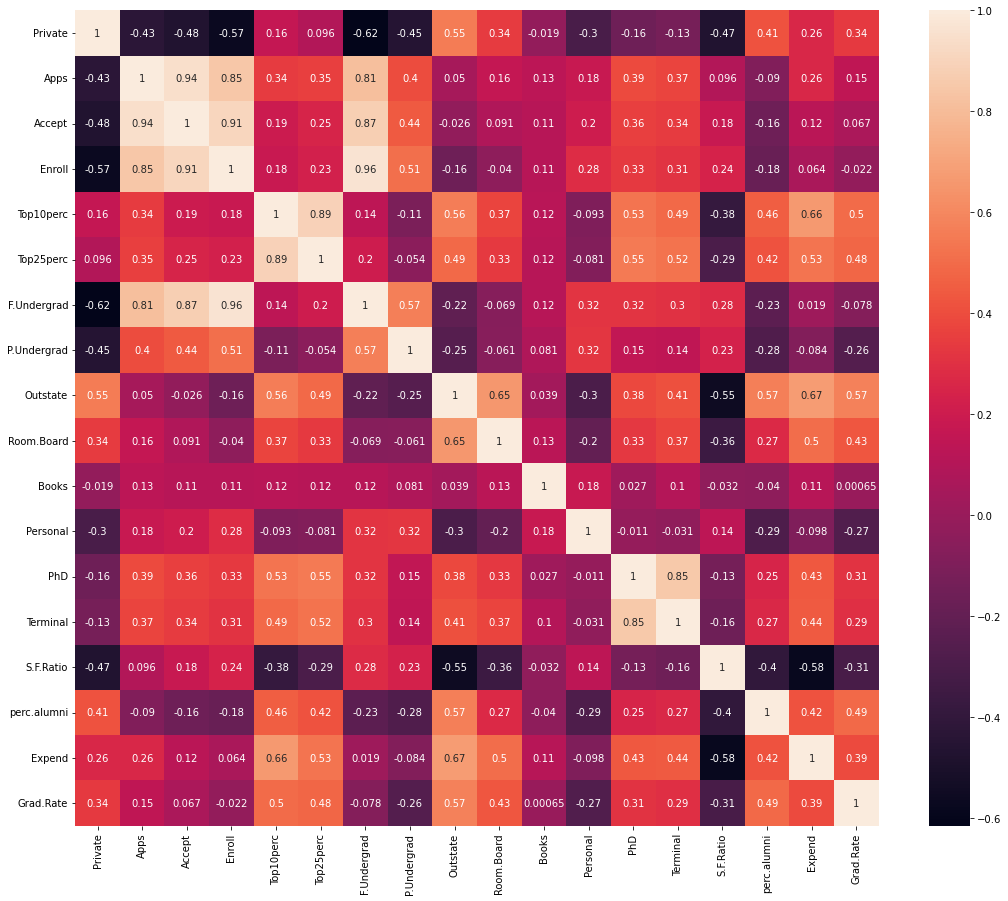

In [157]:
corr_matrix = df_data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True)

### EDA Takeaways

1. The price of out of state tuition is a clear indicator of the status of the university.

2. Enrollment numbers have the least correlation with the status of college (private/public).

## Split data into 70/30 train/test split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(df_data.drop(columns=['Private']), df_data['Private'], test_size=0.3, random_state=101)

In [165]:
print(len(df_data),len(x_train))
x_train.head()

777 543


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
University of Utah,5095,4491,2400,27,53,13894,8374,6857,3975,858,3093,89,93,12.8,9,9275,37
Calvin College,1784,1512,913,29,56,3401,136,10230,3710,400,1210,75,81,14.8,41,7786,81
Centenary College,369,312,90,12,46,396,526,11400,5400,500,760,41,85,9.5,20,9583,24
College of Mount St. Joseph,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100


## Kmeans Model
training the NMF model with default values other than the number of components

In [166]:
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init=10, random_state=100, algorithm='auto')
kmeans = kmeans.fit(x_train)

In [167]:
print(confusion_matrix(y_train,kmeans.labels_))
print(classification_report(y_train,kmeans.labels_))

[[ 52 102]
 [ 21 368]]
              precision    recall  f1-score   support

           0       0.71      0.34      0.46       154
           1       0.78      0.95      0.86       389

    accuracy                           0.77       543
   macro avg       0.75      0.64      0.66       543
weighted avg       0.76      0.77      0.74       543



the model is not very accurate, so lets check with testing data.

In [168]:
preds = kmeans.predict(x_test)

In [169]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[ 21  37]
 [ 13 163]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.46        58
           1       0.81      0.93      0.87       176

    accuracy                           0.79       234
   macro avg       0.72      0.64      0.66       234
weighted avg       0.77      0.79      0.77       234



## Conclusion


The model needs to be fine tuned with parameters that provide the best accuracy for each input data. For me these parameters provided the most accuracy, but a more reliable model can be used for different data. In this run there seem to be more false negatives as it is favoring classifying private colleges as public. There also seems to be variance within each run as some runs resulted in more false positives than false negatives. 

Overall, this process can be used with more datapoints and it will provide a better result. This use case is also not the best, but as Kaggle datasets vary in complexity, I believe this was perfect for this final project to show my ability to construct a model and analysis around datasets. 